In [1]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import matplotlib.pyplot as plt

In [3]:
pwd

'c:\\Users\\Stenh\\OneDrive - Uppsala universitet\\Termin 4\\Examensarbete_analys'

<h1>Inl√§sning, transformering och kontroll av data</h1>

In [ ]:

df = pd.read_csv("138svar.csv", encoding="utf-8", delimiter = ",")

In [ ]:
# df = df.drop(df.index[:3])
# df = df.reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Tidst√§mpel                                                                                                          100 non-null    object 
 1   K√∂n                                                                                                                 100 non-null    object 
 2   Vilken √•rskurs g√•r du i?                                                                                            100 non-null    object 
 3   Vilket av f√∂ljande beskriver b√§st ditt program?                                                                     100 non-null    object 
 4   Hur m√•nga inv√

In [7]:
df.drop(columns="Tidst√§mpel", axis=1, inplace=True)

In [8]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen f√∂r de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [9]:
df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 41 columns):
 #   Column                                                                                                              Non-Null Count  Dtype   
---  ------                                                                                                              --------------  -----   
 0   K√∂n                                                                                                                 100 non-null    category
 1   Vilken √•rskurs g√•r du i?                                                                                            100 non-null    category
 2   Vilket av f√∂ljande beskriver b√§st ditt program?                                                                     100 non-null    category
 3   Hur m√•nga inv√•nare har orten d√§r du bor?                                                                            100 non-null    category
 4   Jag k√§

In [11]:
kolumner_att_√§ndra = df.columns[[6, 7, 8, 9, 10]]

df[kolumner_att_√§ndra] = df[kolumner_att_√§ndra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [12]:
print(kolumner_att_√§ndra)

Index(['Jag v√§ljer "Godk√§nn alla cookies".', 'Jag v√§ljer "Till√•t alla". ',
       'Jag v√§ljer "Acceptera alla cookies". ',
       'Jag v√§ljer "Acceptera alla cookies". .1',
       'Jag v√§ljer "Till√•t alla". .1'],
      dtype='object')


<h1>Kategorisering</h1>

In [13]:
df_demografi = df.iloc[:,:6]

In [ ]:
# V√§lj kolumnerna med index 19 till 27 (slutet √§r exklusivt s√• vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]


# Platta ut alla v√§rden till en l√•ng array och r√§kna ut medelv√§rde
medelv√§rde_k = utvalda_k.values.flatten().mean()
medelv√§rde_k1 = utvalda_k1.values.flatten().mean()
medelv√§rde_k2 = utvalda_k2.values.flatten().mean()
medelv√§rde_a = utvalda_a.values.flatten().mean()
medelv√§rde_a1 = utvalda_a1.values.flatten().mean()
medelv√§rde_a2 = utvalda_a2.values.flatten().mean()
medelv√§rde_b = utvalda_b.values.flatten().mean()
medelv√§rde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelv√§rde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelv√§rde_b2 = utvalda_b2.values.flatten().mean()
medelv√§rde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelv√§rdet som enda v√§rde
df_kategoriserad = pd.DataFrame({
                      'K': [medelv√§rde_k],
                      'K_grundl√§ggande': [medelv√§rde_k1],
                      'K_integritet': [medelv√§rde_k2],
                      'A': [medelv√§rde_a],
                      'A_egen_data': [medelv√§rde_a1],
                      'A_gen_insamling': [medelv√§rde_a2],
                      'B': [medelv√§rde_b],
                      'B_bilder_dark': [medelv√§rde_b1_dark],
                      'B_bilder_no_dark': [medelv√§rde_b1_no_dark],
                      'B2_agerande': [medelv√§rde_b2],
                      'B3_aktivt agerande': [medelv√§rde_b3]
                      })

In [15]:
df_kategoriserad.head()

K  K_grundl√§ggande  K_integritet      A  A_egen_data  \
0  3.789167         3.606667      3.971667  4.285      4.16875   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0           4.5175  2.447273       1.993333              2.24         2.99   

   B3_aktivt agerande  
0            2.496667

In [16]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'K√∂n': df.iloc[:,0],
                      '√Örskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Inv√•nare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundl√§ggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [17]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0     Man  √Örskurs 3     Naturvetenskap    medel  3.25         1.833333   
1     Man  √Örskurs 3  Samh√§llsvetenskap    medel  1.58         2.166667   
2  Kvinna  √Örskurs 3     Naturvetenskap    liten  1.67         2.333333   
3  Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
4  Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      4.666667  5.500000        5.500             5.50  2.181818   
1      1.000000  4.833333        4.625             5.25  1.545455   
2      1.000000  6.250000        6.000             6.75  1.363636   
3      3.500000  4.666667        4.375             5.25  1.000000   
4      5.500000  4.416667        4.250             4.75  2.727273   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               3.5     3.666667                 1.0  
1       1.000000               2.0     2.333333                 1.0  
2       1.000000               1.0     2.333333                 1.0  
3       1.000000               1.0     1.000000                 1.0  
4       1.666667               2.0     4.000000                 3.0

<h1>Demografi</h1>

In [18]:
df_demografi.head()

K√∂n  Vilken √•rskurs g√•r du i?  \
0     Man                √Örskurs 3   
1     Man                √Örskurs 3   
2  Kvinna                √Örskurs 3   
3  Kvinna                √Örskurs 3   
4  Kvinna                √Örskurs 3   

  Vilket av f√∂ljande beskriver b√§st ditt program?   \
0                                   Naturvetenskap   
1                                Samh√§llsvetenskap   
2                                   Naturvetenskap   
3                                Samh√§llsvetenskap   
4                                   Naturvetenskap   

  Hur m√•nga inv√•nare har orten d√§r du bor?  Jag k√§nner till GDPR.   \
0                                    medel                     5.0   
1                                    medel                     1.0   
2                                    liten                     5.0   
3                                    liten                     5.0   
4                                    liten                     6.0   

   Jag litar p√• att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.    
0                                                5.0                                    
1                                                7.0                                    
2                                                4.0                                    
3                                                3.0                                    
4                                                6.0

<module 'matplotlib.pyplot' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\pyplot.py'>

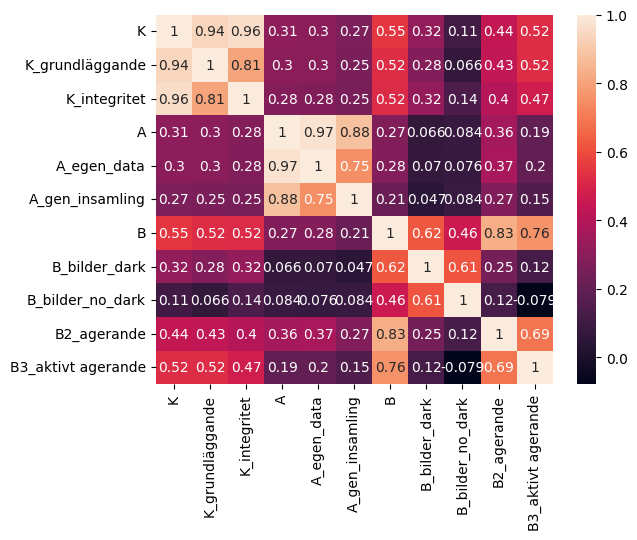

In [19]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelv√§rde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [20]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_fr√•gor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_fr√•gor / varians_total)

  return round(alpha, 3)

In [21]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.954 0.91 0.945 attityd = 0.931 0.92 0.805 beteende = 0.81 0.878 0.788 0.723 0.805


<h1>Korrelationstest</h1>

In [22]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib.pyplot' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\pyplot.py'>

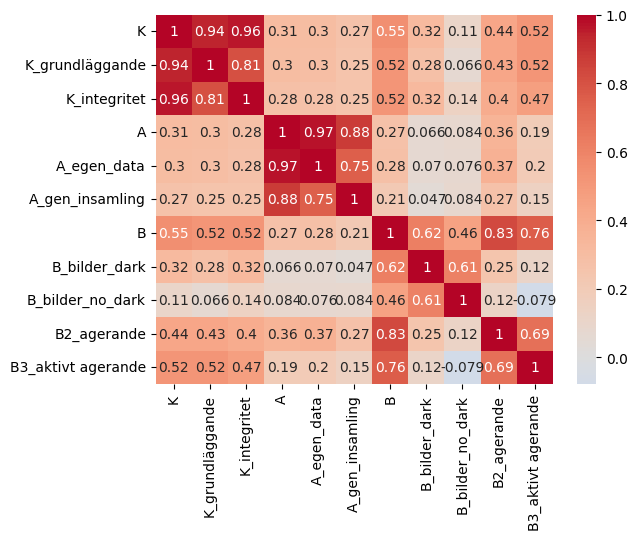

In [23]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>SEM</h1>

In [24]:
!pip install semopy

Defaulting to user installation because normal site-packages is not writeable


In [25]:
# 1. INSTALLERA n√∂dv√§ndiga paket f√∂rst via terminal:
# pip install pandas semopy openpyxl

import pandas as pd
from semopy import Model, Optimizer
from semopy.inspector import inspect

# # 2. L√ÑS IN DIN CSV
# df = pd.read_csv("Unders√∂kning om gymnasieelevers cookie-hantering (Svar) - Formul√§rsvar 1.csv")
# df.columns = df.columns.str.strip()

# 3. DEFINIERA KAB-GRUPPER baserat p√• index
behavior_cols = df.columns[5:17].tolist()
knowledge_cols = df.columns[17:29].tolist()
attitude_cols = df.columns[29:].tolist()

# 4. D√ñP OM kolumner till enklare namn
rename_map = {}
for i, col in enumerate(knowledge_cols):
    rename_map[col] = f"K{i+1}"
for i, col in enumerate(attitude_cols):
    rename_map[col] = f"A{i+1}"
for i, col in enumerate(behavior_cols):
    rename_map[col] = f"B{i+1}"

df_clean = df.rename(columns=rename_map)

# 5. SKAPA MODELL i semopy-syntax
model_desc = f"""
Knowledge =~ {' + '.join(rename_map[c] for c in knowledge_cols)}
Attitude  =~ {' + '.join(rename_map[c] for c in attitude_cols)}
Behavior  =~ {' + '.join(rename_map[c] for c in behavior_cols)}

Attitude ~ Knowledge
Behavior ~ Attitude
"""

# 6. Rensa bort tomma rader f√∂r SEM
df_clean = df_clean.dropna(subset=rename_map.values())

# 7. BYGG OCH TR√ÑNA MODELLEN
model = Model(model_desc)
model.fit(df_clean)

# 8. VISA RESULTAT
results = inspect(model)
print("\n--- SEM Resultat (koefficienter & p-v√§rden) ---")
print(results)





--- SEM Resultat (koefficienter & p-v√§rden) ---
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   Attitude   ~  Knowledge  0.298542  0.108114  2.761369  0.005756
1   Behavior   ~   Attitude -0.031418  0.039518 -0.795031  0.426596
2         K1   ~  Knowledge  1.000000         -         -         -
3         K2   ~  Knowledge  1.243913  0.124476  9.993173       0.0
4         K3   ~  Knowledge  0.962615  0.134625  7.150359       0.0
..       ...  ..        ...       ...       ...       ...       ...
72        K5  ~~         K5  1.551313  0.231539  6.700019       0.0
73        K6  ~~         K6  0.900535  0.146157  6.161422       0.0
74        K7  ~~         K7  1.549777  0.237179  6.534212       0.0
75        K8  ~~         K8  1.016428  0.165893  6.127027       0.0
76        K9  ~~         K9  1.145900  0.184572  6.208432       0.0

[77 rows x 7 columns]


In [26]:
from semopy.inspector import inspect

# H√§mta standardiserade v√§rden
estimates = inspect(model)

# R√§kna ut R¬≤ manuellt
def calculate_r2(est_df, dependent_var):
    effects = est_df[(est_df["op"] == "~") & (est_df["lval"] == dependent_var)]
    r2 = sum(effects["Estimate"]**2)
    return r2

dependent_vars = ["Attitude", "Behavior"]

print("\n--- R¬≤ f√∂r beroende latenta variabler ---")
for var in dependent_vars:
    r2_val = calculate_r2(estimates, var)
    print(f"{var}: {r2_val:.3f}")




--- R¬≤ f√∂r beroende latenta variabler ---
Attitude: 0.089
Behavior: 0.001


In [27]:
from semopy import semplot

# Skapa en PDF- eller PNG-bild av modellen
semplot(model, 'kab_model.png')  # eller .pdf
print("Modellen √§r sparad som kab_model.png")


Modellen √§r sparad som kab_model.png


<h1>T-test/ANOVA</h1>

***T-Test f√∂r grupper som k√§nner till/ inte k√§nner till GDPR***

-   Resultaten fr√•n t-testerna visar att det inte finns n√•gra statistiskt signifikanta skillnader i kunskap, attityd eller beteende mellan elever som rapporterar l√•g respektive h√∂g k√§nnedom om GDPR (p > 0.05). Detta tyder p√• att sj√§lvupplevd GDPR-k√§nnedom inte n√∂dv√§ndigtvis inneb√§r en djupare f√∂rst√•else f√∂r cookies, inte heller en mer integritetsmedveten attityd eller f√∂r√§ndrat beteende. Resultatet kan ses i ljuset av den s√• kallade privacy paradox, d√§r individer uttrycker oro f√∂r sin integritet men inte agerar i linje med denna oro. Det antyder att insatser som syftar till att √∂ka medvetenheten om integritet beh√∂ver g√• bortom ren informationsspridning och i st√§llet fokusera p√• att √∂ka faktisk f√∂rst√•else och anv√§ndarkompetens.

In [28]:
df_tTest = df_resp_sum.copy()

gdpr_k√§nnedom = df.iloc[:, 31]

df_tTest['Integritet_online'] = gdpr_k√§nnedom

l√•g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] < 4]
h√∂g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] > 4]

from scipy.stats import ttest_ind

t_k = ttest_ind(h√∂g_k√§nnedom['K'], l√•g_k√§nnedom['K'], nan_policy='omit')
t_a = ttest_ind(h√∂g_k√§nnedom['A'], l√•g_k√§nnedom['A'], nan_policy='omit')
t_b = ttest_ind(h√∂g_k√§nnedom['B'], l√•g_k√§nnedom['B'], nan_policy='omit')

print("üìò T-test: Kunskap (K)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (A)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (B)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")




üìò T-test: Kunskap (K)
  t = 3.890, p = 0.0002
üìó T-test: Attityd (A)
  t = 6.104, p = 0.0000
üìô T-test: Beteende (B)
  t = 3.424, p = 0.0010


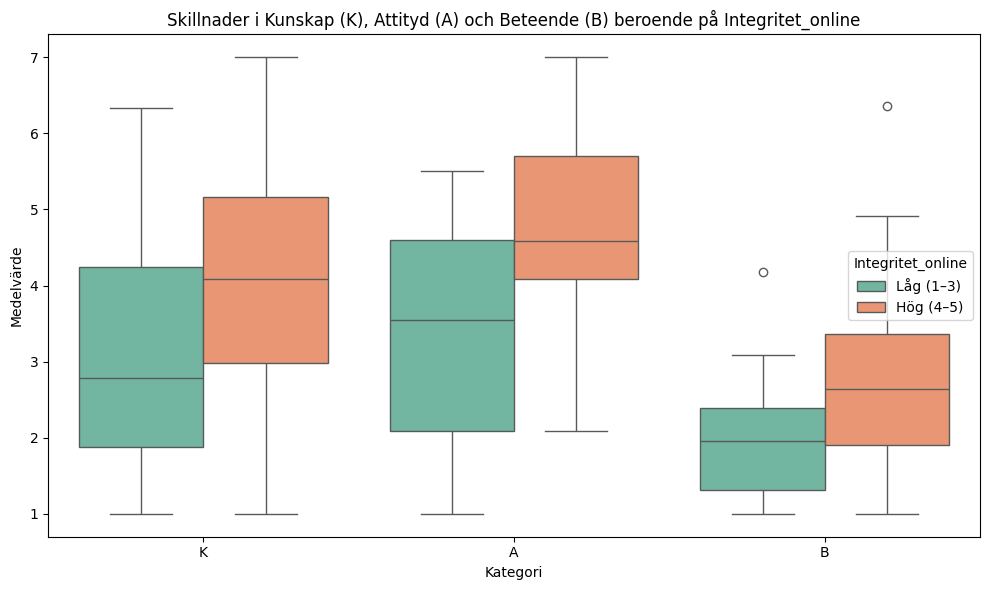

In [29]:
df_tTest['Integritet_online_grupp'] = df_tTest['Integritet_online'].apply(
    lambda x: 'L√•g (1‚Äì3)' if x < 4 else 'H√∂g (4‚Äì5)'
)

df_melted = df_tTest.melt(id_vars="Integritet_online_grupp", value_vars=["K", "A", "B"],
                          var_name="Kategori", value_name="V√§rde")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="Integritet_online_grupp", palette="Set2")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) beroende p√• Integritet_online")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="Integritet_online")
plt.tight_layout()
plt.show()



***T-TEst f√∂r skillnad mellan k√∂n***

Resultaten fr√•n t-tester visar att det finns en statistiskt signifikant k√∂nsskillnad i b√•de kunskapsniv√• och beteende kopplat till cookies, men inte i attityd. M√§n och kvinnor skiljer sig allts√• i hur mycket de vet om cookies, samt hur de agerar i praktiken (t.ex. raderar cookies eller blockerar sp√•rning), men har en liknande inst√§llning till datainsamling. Det antyder att k√∂n kan vara en relevant faktor vid utformning av informationsinsatser, s√§rskilt om m√•let √§r att √∂ka faktisk f√∂rst√•else eller f√∂r√§ndra beteende. Att attityden d√§remot inte skiljer sig kan tyda p√• att b√•de m√§n och kvinnor i liknande grad v√§rderar digital integritet, men att de oms√§tter den i handling p√• olika s√§tt.

In [30]:
from scipy.stats import ttest_ind

# L√§gg till k√∂n i df_resp_sum (index 1 = k√∂nskolumn i ursprunglig df)


# Skapa tv√• grupper
kvinnor = df_resp_sum[df_resp_sum['K√∂n'] == 'Kvinna']
m√§n = df_resp_sum[df_resp_sum['K√∂n'] == 'Man']

# K√∂r t-tester f√∂r K, A, B
t_k = ttest_ind(kvinnor['K'], m√§n['K'], nan_policy='omit')
t_a = ttest_ind(kvinnor['A'], m√§n['A'], nan_policy='omit')
t_b = ttest_ind(kvinnor['B'], m√§n['B'], nan_policy='omit')

# Visa resultat
print("üìò T-test: Kunskap (K√∂nsskillnad)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (K√∂nsskillnad)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (K√∂nsskillnad)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")


üìò T-test: Kunskap (K√∂nsskillnad)
  t = -2.686, p = 0.0085
üìó T-test: Attityd (K√∂nsskillnad)
  t = 1.007, p = 0.3167
üìô T-test: Beteende (K√∂nsskillnad)
  t = -2.293, p = 0.0240


In [31]:
print(kvinnor['B'].mean(), m√§n['B'].mean())

2.090909090909091 2.611940298507463


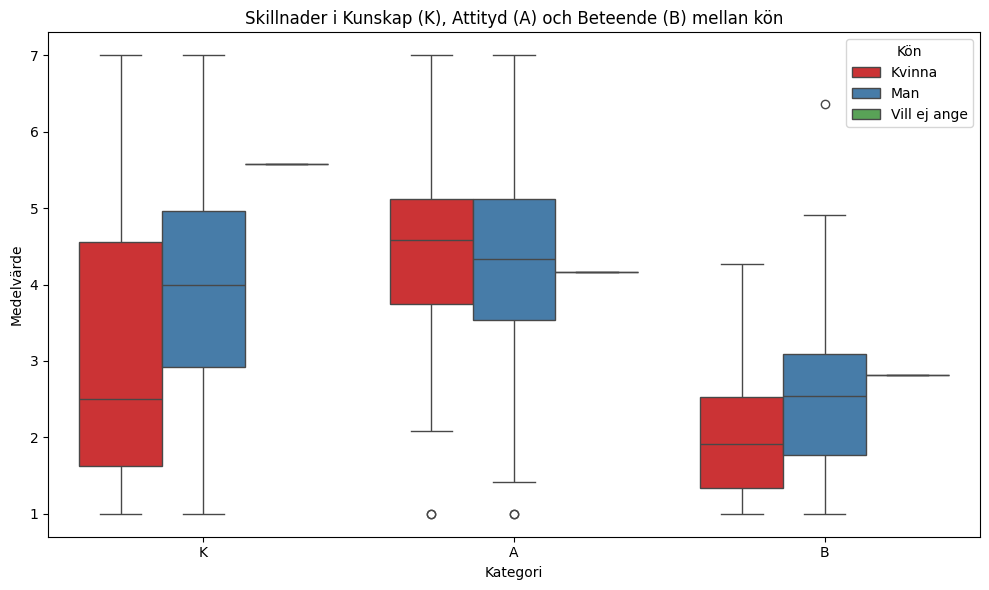

In [32]:
# G√∂r om till l√•ngform f√∂r seaborn
df_melted = df_resp_sum.melt(id_vars="K√∂n", value_vars=["K", "A", "B"], 
                             var_name="Kategori", value_name="V√§rde")

# Rita boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="K√∂n", palette="Set1")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) mellan k√∂n")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="K√∂n")
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import ttest_rel

# Exempel ‚Äì byt till dina faktiska kolumnnamn!
t_stat, p_value = ttest_rel(df_resp_sum['B_bilder_no_dark'], df_resp_sum['B_bilder_dark'])

print("üìä Parat t-test ‚Äì ben√§genhet att neka cookies")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")


üìä Parat t-test ‚Äì ben√§genhet att neka cookies
  t = 2.026, p = 0.0454


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\3881499562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\3881499562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")


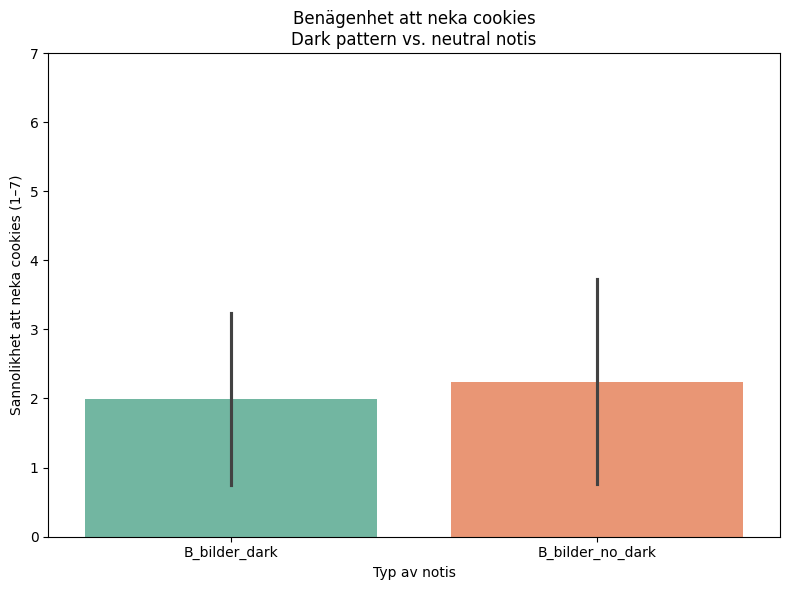

In [34]:
# Sm√§lt till l√•ng format f√∂r seaborn
df_melted = df_resp_sum.melt(value_vars=["B_bilder_dark", "B_bilder_no_dark"],
                           var_name="Typ av notis", value_name="Svar")

# Rita barplot med medelv√§rden
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
plt.title("Ben√§genhet att neka cookies\nDark pattern vs. neutral notis")
plt.ylabel("Sannolikhet att neka cookies (1‚Äì7)")
plt.xlabel("Typ av notis")
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

In [35]:
df_resp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   K√∂n                 100 non-null    category
 1   √Örskurs             100 non-null    category
 2   Program             100 non-null    category
 3   Inv√•nare            100 non-null    category
 4   K                   100 non-null    float64 
 5   K_grundl√§ggande     100 non-null    float64 
 6   K_integritet        100 non-null    float64 
 7   A                   100 non-null    float64 
 8   A_egen_data         100 non-null    float64 
 9   A_gen_insamling     100 non-null    float64 
 10  B                   100 non-null    float64 
 11  B_bilder_dark       100 non-null    float64 
 12  B_bilder_no_dark    100 non-null    float64 
 13  B2_agerande         100 non-null    float64 
 14  B3_aktivt agerande  100 non-null    float64 
dtypes: category(4), float64(11)
memory us

<h1>T-TEST K√ñN<h1>

In [36]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["K"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["K"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")


T-statistik: -2.552
P-v√§rde: 0.014


In [37]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["A"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["A"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: 0.991
P-v√§rde: 0.326


In [38]:
from scipy.stats import ttest_ind

# Dela upp datan baserat p√• k√∂n
kvinnor = df_resp_sum[df_resp_sum["K√∂n"] == "Kvinna"]["B"]
m√§n = df_resp_sum[df_resp_sum["K√∂n"] == "Man"]["B"]

# T-test (standard: equal_var=True antar lika varians)
t_stat, p_val = ttest_ind(kvinnor, m√§n, equal_var=False)  # Welch's t-test (s√§krare)

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: -2.384
P-v√§rde: 0.020


<h1>T-TEST √ÖRSKURS<h1>

In [39]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0     Man  √Örskurs 3     Naturvetenskap    medel  3.25         1.833333   
1     Man  √Örskurs 3  Samh√§llsvetenskap    medel  1.58         2.166667   
2  Kvinna  √Örskurs 3     Naturvetenskap    liten  1.67         2.333333   
3  Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
4  Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      4.666667  5.500000        5.500             5.50  2.181818   
1      1.000000  4.833333        4.625             5.25  1.545455   
2      1.000000  6.250000        6.000             6.75  1.363636   
3      3.500000  4.666667        4.375             5.25  1.000000   
4      5.500000  4.416667        4.250             4.75  2.727273   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               3.5     3.666667                 1.0  
1       1.000000               2.0     2.333333                 1.0  
2       1.000000               1.0     2.333333                 1.0  
3       1.000000               1.0     1.000000                 1.0  
4       1.666667               2.0     4.000000                 3.0

In [40]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["K"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["K"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: 1.198
P-v√§rde: 0.239


In [41]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["A"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["A"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: -2.033
P-v√§rde: 0.049


In [42]:
from scipy.stats import ttest_ind

# Filtrera ut elever i √•rskurs 1 och 2
√•r1 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 1"]["B"]
√•r2 = df_resp_sum[df_resp_sum["√Örskurs"] == "√Örskurs 3"]["B"]

# T-test
t_stat, p_val = ttest_ind(√•r1, √•r2, equal_var=False)  # Welch's t-test

print(f"T-statistik: {t_stat:.3f}")
print(f"P-v√§rde: {p_val:.3f}")

T-statistik: -0.124
P-v√§rde: 0.902


<h1>MEDELV√ÑRDE<h1>

In [49]:
df_kategoriserad

K  K_grundl√§ggande  K_integritet      A  A_egen_data  \
0  3.789167         3.606667      3.971667  4.285      4.16875   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0           4.5175  2.447273       1.993333              2.24         2.99   

   B3_aktivt agerande  
0            2.496667

In [44]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['K']].mean()

# G√∂r om k√∂n till kolumner
tabell_K = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_K.columns = [f"{col[0]} - {col[1]}" for col in tabell_K.columns]

# Visa tabellen
print(tabell_K)

           K - Kvinna   K - Man  K - Vill ej ange
√Örskurs                                          
√Örskurs 1    3.250556  4.071864               NaN
√Örskurs 2         NaN       NaN              5.58
√Örskurs 3    2.977143  4.113750               NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\1890733522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['K']].mean()


In [53]:


print(utvalda_k1.mean(numeric_only=True))
print(utvalda_k2.mean(numeric_only=True))

Jag har god kunskap om cookies.                                                         2.98
Jag k√§nner till vad cookies anv√§nds till.                                               3.58
Jag vet skillnaden mellan n√∂dv√§ndiga och icke-n√∂dv√§ndiga cookies.                       2.86
Jag vet att det g√•r att anpassa eller neka cookies n√§r jag bes√∂ker en ny webbplats.     4.63
Jag k√§nner till att cookies anv√§nds f√∂r grundl√§ggande funktioner p√• en hemsida.         3.69
Jag k√§nner till att cookies anv√§nds f√∂r √∂ka anv√§ndarupplevelsen p√• en hemsida.          3.90
dtype: float64
Jag k√§nner till att cookies kan lagra personliga uppgifter som jag l√§mnat p√• en webbplats.                            4.19
Jag vet att cookies kan anv√§ndas f√∂r att samla in information om mitt beteende online.                                4.17
Jag √§r medveten om att cookies kan anv√§ndas f√∂r att bygga en profil av mig som internetanv√§ndare.                     4.04
Jag k√§nner till att cookies 

In [45]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['A']].mean()

# G√∂r om k√∂n till kolumner
tabell_A = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_A.columns]

# Visa tabellen
print(tabell_A)



           A - Kvinna   A - Man  A - Vill ej ange
√Örskurs                                          
√Örskurs 1    4.375000  4.064972               NaN
√Örskurs 2         NaN       NaN          4.166667
√Örskurs 3    4.654762  5.072917               NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\1293533543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['A']].mean()


In [46]:
df["Vilken √•rskurs g√•r du i?"].value_counts()

Vilken √•rskurs g√•r du i?
√Örskurs 1    77
√Örskurs 3    22
√Örskurs 2     1
Name: count, dtype: int64

In [47]:
# Gruppera f√∂rst som vanligt
medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['B']].mean()

# G√∂r om k√∂n till kolumner
tabell_B = medel_per_√•rskurs_k√∂n.unstack('K√∂n')

# Platta kolumnindex f√∂r tydlighet
tabell_A.columns = [f"{col[0]} - {col[1]}" for col in tabell_B.columns]

# Visa tabellen
print(tabell_B)

                  B                       
K√∂n          Kvinna       Man Vill ej ange
√Örskurs                                   
√Örskurs 1  1.984848  2.573190          NaN
√Örskurs 2       NaN       NaN     2.818182
√Örskurs 3  2.227273  2.897727          NaN


C:\Users\Stenh\AppData\Local\Temp\ipykernel_12300\238364228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medel_per_√•rskurs_k√∂n = df_resp_sum.groupby(['√Örskurs', 'K√∂n'])[['B']].mean()


In [48]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0     Man  √Örskurs 3     Naturvetenskap    medel  3.25         1.833333   
1     Man  √Örskurs 3  Samh√§llsvetenskap    medel  1.58         2.166667   
2  Kvinna  √Örskurs 3     Naturvetenskap    liten  1.67         2.333333   
3  Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
4  Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      4.666667  5.500000        5.500             5.50  2.181818   
1      1.000000  4.833333        4.625             5.25  1.545455   
2      1.000000  6.250000        6.000             6.75  1.363636   
3      3.500000  4.666667        4.375             5.25  1.000000   
4      5.500000  4.416667        4.250             4.75  2.727273   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               3.5     3.666667                 1.0  
1       1.000000               2.0     2.333333                 1.0  
2       1.000000               1.0     2.333333                 1.0  
3       1.000000               1.0     1.000000                 1.0  
4       1.666667               2.0     4.000000                 3.0